In [1]:
pip install spotipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import time

client_id = "個人情報のため非掲載"
client_secret = "個人情報のため非掲載"

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [3]:
#trackIDを１つにまとめる。
def get_track_ids_for_playlist(playlist_id):
    track_ids = []
    playlist = sp.playlist(playlist_id)

    while playlist['tracks']['next']:
        for item in playlist['tracks']['items']:
            track = item['track']
            if not track['id'] in track_ids:
                track_ids.append(track['id'])
        playlist['tracks'] = sp.next(playlist['tracks'])
    else:
        for item in playlist['tracks']['items']:
            track = item['track']
            if not track['id'] in track_ids:
                track_ids.append(track['id'])

    return track_ids


playlist_ids = ['37i9dQZF1DX1s9knjP51Oa']


all_track_ids = []
for playlist_id in playlist_ids:
    track_ids = get_track_ids_for_playlist(playlist_id)
    all_track_ids.extend(track_ids)

#重複しているIDは削除する。=データフレーム形式に変換が必要→またリストに戻す。
df_all_track_ids = pd.DataFrame(all_track_ids, columns=['track_id'])
df_all_track_ids.drop_duplicates (subset=['track_id'], inplace=True)

df_list = df_all_track_ids['track_id'].values.tolist()


print(len(df_list))
print(df_list)

#Peaceful Piano                37i9dQZF1DX4sWSpwq3LiO
#Calm Vibes                   37i9dQZF1DX1s9knjP51Oa
#Classical Sleep                37i9dQZF1DX8Sz1gsYZdwj
#Atmospheric Piano            37i9dQZF1DWURCUKHUKWCX
#Instrumental Study            37i9dQZF1DX9sIqqvKsjG8
#Piano in the Background      37i9dQZF1DX7K31D69s4M1
#Sleepy Piano                  37i9dQZF1DX03b46zi3S82
#Melancholy Instrumentals　　　    37i9dQZF1DWZrc3lwvImLj

#自曲NeoClassical    5so5bRjsngVqRvRzMVqbhc



203
['0SGBSwX49QWTGiXMu39mUz', '7jUgBIVfc6C2YfFqFmETxz', '7JuANIIOksqHRFXgE8tEld', '6KMs0FhZnbJZINvhguzhpe', '25DsngbeW7QvMTuPJBy8ww', '4SOjleSx0GEXcSYvWRA6cI', '3JWltf5Em6j7uhJhSNFneD', '4fGktu4RYSYuF05at1ToLu', '21qsu8rj7gvICuv0P6ZzsW', '3RI7rnK1YgmyRcXq9pkMqQ', '2ODAJGjI4YZwWp470XsV41', '22fK1BNvptS8jrDqgMQ7Em', '61TS7LURuPHVDdVsuWvxfC', '0jFnlaavbGTER2XNnUztEF', '38GNL3kBcQafMTKT5tom7c', '64ovZi9kM3UqPSPgGYaf5l', '3ANR14gcrMm6asGMNVhivt', '6xld6bFu5ST7nickcSK1lP', '6GHd82pXaq3hZmH0gw2pib', '3i1rbYtU8ktIHUIKH1pLKY', '3TKBlpWAXmf6HGMu4GkLGD', '6brQG7CUofzdsnNx3qssrh', '5LmaeC0bRQqaHtK781KOhD', '6kJ4jRr1SB2ao8VimAiuB0', '6CWzmoxDJJdIJ5GImw0RHv', '6fHq66kBS2OJiWu3ZGNZj9', '5D1S7lI0guR6YcGcKjtNbq', '078tv0fBjcReoPb9IL97b7', '3eGygw8GYEYWknt1JeZAQ1', '0X3mDFl8poPzyNQmrTe9fr', '5tC7qnCutl9HLMAOeUaZxo', '47Dbe09uprsTUFezKfy594', '2zVMhbaUO3mBXZ16YFtOoP', '6MTI6CKlLOZapPzdT4zJLH', '0ibKzzyo527y98eTHe7Ktg', '4ZnUrXGZhm577FUd29Pz2f', '391l8re8aew1rvyNOXUYDD', '5ZX0EY0qNRf1oF3q1cyzJ0', '1qXgnb

In [4]:
def getTrackFeatures(id):
  meta = sp.track(id)
  features = sp.audio_features(id)
  #idが情報を持っていない場合、実行をスキップする

  #if構文を入れる（trackが削除されている場合を想定する）
  if features[0] is None:
    return ''
  else:
    track_id = meta["id"]
    name = meta['name']
    album = meta['album']['name']
    artist = meta['album']['artists'][0]['name']
    release_date = meta['album']['release_date']
    length = meta['duration_ms']
    popularity = meta['popularity']
    key = features[0]['key']
    mode = features[0]['mode']
    danceability = features[0]['danceability']
    acousticness = features[0]['acousticness']
    energy = features[0]['energy']
    instrumentalness = features[0]['instrumentalness']
    liveness = features[0]['liveness']
    loudness = features[0]['loudness']
    speechiness = features[0]['speechiness']
    tempo = features[0]['tempo']
    time_signature = features[0]['time_signature']
    valence = features[0]['valence']

    track = [track_id, name, album, artist, release_date, length, popularity, key, mode, danceability, acousticness, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature, valence]
    return track

tracks = []
for track_id in track_ids:
  time.sleep(0.5)
  track = getTrackFeatures(track_id)

  if track != '':
    tracks.append(track)

df = pd.DataFrame(tracks, columns = ['track_id', 'name', 'album', 'artist', 'release_date', 'length', 'popularity', 'key', 'mode', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature', 'valence'])
df.head()

,track_id,name,album,artist,release_date,length,popularity,key,mode,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence
0,0SGBSwX49QWTGiXMu39mUz,Stillness,Stillness,Fraser Jaspal,2023-03-03,142008,59,2,1,0.520,0.996,0.00486,0.950,0.1110,-30.233,0.0457,75.342,4,0.561
1,7jUgBIVfc6C2YfFqFmETxz,Air from Air,Air from Air,Yasuo Zen,2023-03-03,199428,66,6,1,0.538,0.995,0.01010,0.942,0.0880,-29.191,0.0363,68.322,4,0.481
2,7JuANIIOksqHRFXgE8tEld,Lisser,Lisser,Miran,2023-03-03,125041,67,4,1,0.325,0.984,0.06150,0.923,0.0820,-27.534,0.0352,94.597,3,0.312
3,6KMs0FhZnbJZINvhguzhpe,Amber,Come Fall,Kepus,2022-09-17,123304,49,11,1,0.358,0.994,0.02260,0.894,0.0991,-29.195,0.0623,86.595,4,0.401
4,25DsngbeW7QvMTuPJBy8ww,Down The Line,Down The Line,Cassandra Millen,2023-04-28,146862,54,9,0,0.391,0.993,0.00926,0.940,0.0930,-29.409,0.0460,95.998,3,0.176


In [5]:
#自曲＝１、それ以外＝０で
df.shape

(202, 19)

In [6]:
df1 = df.drop(columns = ['name','track_id', 'album', 'artist', 'release_date', 'length', 'popularity', 'key', 'mode', 'loudness', 'tempo', 'time_signature', 'valence'])
df1.head()
#あとで出力するときに'track_id'が必要

,danceability,acousticness,energy,instrumentalness,liveness,speechiness
0,0.520,0.996,0.00486,0.950,0.1110,0.0457
1,0.538,0.995,0.01010,0.942,0.0880,0.0363
2,0.325,0.984,0.06150,0.923,0.0820,0.0352
3,0.358,0.994,0.02260,0.894,0.0991,0.0623
4,0.391,0.993,0.00926,0.940,0.0930,0.0460


In [7]:
df2=df1.assign(name_number=0)
df2.head()

,danceability,acousticness,energy,instrumentalness,liveness,speechiness,name_number
0,0.520,0.996,0.00486,0.950,0.1110,0.0457,0
1,0.538,0.995,0.01010,0.942,0.0880,0.0363,0
2,0.325,0.984,0.06150,0.923,0.0820,0.0352,0
3,0.358,0.994,0.02260,0.894,0.0991,0.0623,0
4,0.391,0.993,0.00926,0.940,0.0930,0.0460,0


In [57]:
#trackIDを１つにまとめる。
def get_track_ids_for_playlist(playlist_id):
    track_ids = []
    playlist = sp.playlist(playlist_id)

    while playlist['tracks']['next']:
        for item in playlist['tracks']['items']:
            track = item['track']
            if not track['id'] in track_ids:
                track_ids.append(track['id'])
        playlist['tracks'] = sp.next(playlist['tracks'])
    else:
        for item in playlist['tracks']['items']:
            track = item['track']
            if not track['id'] in track_ids:
                track_ids.append(track['id'])

    return track_ids


playlist_ids = ['4VYpmCeXmsEGNqKn5pIzYt']


all_track_ids = []
for playlist_id in playlist_ids:
    track_ids = get_track_ids_for_playlist(playlist_id)
    all_track_ids.extend(track_ids)

#重複しているIDは削除する。=データフレーム形式に変換が必要→またリストに戻す。
df_all_track_ids = pd.DataFrame(all_track_ids, columns=['track_id'])
df_all_track_ids.drop_duplicates (subset=['track_id'], inplace=True)

df_list = df_all_track_ids['track_id'].values.tolist()


print(len(df_list))
print(df_list)

#自曲NeoClassical    4VYpmCeXmsEGNqKn5pIzYt

22
['7EYqha5R0Pty8onSGBHmxB', '1oGTCgHtfMtntMG88l2nii', '1OFiIpCWktByeDCBIfNNAl', '1wPQiFJB11NoYXQNVQ7hrg', '5RT9xG1UEDaM48HyqGaZJS', '7ssdwqAA5Pk5AwbpstlMWi', '2wPZz3bU0sdvW0I5mP9LNZ', '5thHu6dTknfij6M9ZQWy1n', '0dZqFmCZpcUXnbHTVGPOB5', '4fydLPUpvmzST7EyJVpBaC', '6cM8EXEGMx5F9gohfE3ji1', '3Q8inmKvK1uSsOzuuR9WB2', '5bztTzKcpoJsS5UZtvFY2c', '2YVtMf9JE8NgTILjfZZrEY', '3iYTfQeLb6YkJkfLJl1bMr', '44WPUG1RgNbJlEt8UHs1Da', '6tq84d7zjY7MzL07aMQT8G', '2mUnx6LJY8p5Fbe3IRXffw', '04cJzEcakQA1SSldJCGWUv', '43Xz2HbMhIF2vojIHJLxZh', '7KxHTy8kwBYCWEb6WrXxNc', '05QIc2wIs6LOSbgDppX32W']


In [58]:
def getTrackFeatures(id):
  meta = sp.track(id)
  features = sp.audio_features(id)
  #idが情報を持っていない場合、実行をスキップする

  #if構文を入れる（trackが削除されている場合を想定する）
  if features[0] is None:
    return ''
  else:
    track_id = meta["id"]
    name = meta['name']
    album = meta['album']['name']
    artist = meta['album']['artists'][0]['name']
    release_date = meta['album']['release_date']
    length = meta['duration_ms']
    popularity = meta['popularity']
    key = features[0]['key']
    mode = features[0]['mode']
    danceability = features[0]['danceability']
    acousticness = features[0]['acousticness']
    energy = features[0]['energy']
    instrumentalness = features[0]['instrumentalness']
    liveness = features[0]['liveness']
    loudness = features[0]['loudness']
    speechiness = features[0]['speechiness']
    tempo = features[0]['tempo']
    time_signature = features[0]['time_signature']
    valence = features[0]['valence']

    track = [track_id, name, album, artist, release_date, length, popularity, key, mode, danceability, acousticness, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature, valence]
    return track

tracks = []
for track_id in track_ids:
  time.sleep(0.5)
  track = getTrackFeatures(track_id)

  if track != '':
    tracks.append(track)

df3 = pd.DataFrame(tracks, columns = ['track_id', 'name', 'album', 'artist', 'release_date', 'length', 'popularity', 'key', 'mode', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature', 'valence'])
df3.head()
#同じ処理をしてしまっている。＝変数を変える

,track_id,name,album,artist,release_date,length,popularity,key,mode,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence
0,7EYqha5R0Pty8onSGBHmxB,Mercy,Mercy,Tatsuhiro Miyazawa,2024-01-26,169734,1,1,1,0.331,0.991,0.0404,0.920,0.1010,-29.477,0.0390,92.207,3,0.1430
1,1oGTCgHtfMtntMG88l2nii,Aeon,Aeon,Tatsuhiro Miyazawa,2024-01-12,193622,1,7,1,0.394,0.995,0.0224,0.958,0.0997,-35.423,0.0326,78.901,4,0.0378
2,1OFiIpCWktByeDCBIfNNAl,Unfold,Unfold,Tatsuhiro Miyazawa,2023-12-24,145500,11,10,0,0.409,0.993,0.0754,0.937,0.1050,-26.468,0.0455,164.258,4,0.0839
3,1wPQiFJB11NoYXQNVQ7hrg,Tomorrow,Unfold,Tatsuhiro Miyazawa,2023-12-24,176945,0,10,1,0.387,0.988,0.0822,0.924,0.0954,-28.844,0.0330,84.609,4,0.3970
4,5RT9xG1UEDaM48HyqGaZJS,Departure,Unfold,Tatsuhiro Miyazawa,2023-12-24,154486,0,6,1,0.385,0.989,0.0574,0.875,0.0898,-26.381,0.0382,125.795,3,0.1970


In [59]:
#データを削る＝正規化のようにデータを分けるとも考えられる。

df3.shape

(22, 19)

In [60]:
df4 = df3.drop(columns = ['name','track_id', 'album', 'artist', 'release_date', 'length', 'popularity', 'key', 'mode', 'loudness', 'tempo', 'time_signature', 'valence'])
df4.head()

,danceability,acousticness,energy,instrumentalness,liveness,speechiness
0,0.331,0.991,0.0404,0.920,0.1010,0.0390
1,0.394,0.995,0.0224,0.958,0.0997,0.0326
2,0.409,0.993,0.0754,0.937,0.1050,0.0455
3,0.387,0.988,0.0822,0.924,0.0954,0.0330
4,0.385,0.989,0.0574,0.875,0.0898,0.0382


In [61]:
df5=df4.assign(name_number=1)
df5.head()

,danceability,acousticness,energy,instrumentalness,liveness,speechiness,name_number
0,0.331,0.991,0.0404,0.920,0.1010,0.0390,1
1,0.394,0.995,0.0224,0.958,0.0997,0.0326,1
2,0.409,0.993,0.0754,0.937,0.1050,0.0455,1
3,0.387,0.988,0.0822,0.924,0.0954,0.0330,1
4,0.385,0.989,0.0574,0.875,0.0898,0.0382,1


In [62]:
df6 = pd.concat([df2, df5], ignore_index=True)
df6.head()

,danceability,acousticness,energy,instrumentalness,liveness,speechiness,name_number
0,0.520,0.996,0.00486,0.950,0.1110,0.0457,0
1,0.538,0.995,0.01010,0.942,0.0880,0.0363,0
2,0.325,0.984,0.06150,0.923,0.0820,0.0352,0
3,0.358,0.994,0.02260,0.894,0.0991,0.0623,0
4,0.391,0.993,0.00926,0.940,0.0930,0.0460,0


In [63]:
df6.tail()

,danceability,acousticness,energy,instrumentalness,liveness,speechiness,name_number
219,0.360,0.990,0.1060,0.945,0.1360,0.0422,1
220,0.440,0.994,0.0524,0.950,0.1200,0.0399,1
221,0.475,0.989,0.2680,0.915,0.1200,0.0350,1
222,0.374,0.990,0.0843,0.938,0.0885,0.0351,1
223,0.418,0.989,0.0953,0.944,0.1160,0.0358,1


In [64]:
#データの数を確認
df6.isnull().sum()

danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
speechiness         0
name_number         0
dtype: int64

In [65]:
df6.shape

(224, 7)

In [66]:
df7=df6.drop(columns = ['name_number'])
df7.head()

,danceability,acousticness,energy,instrumentalness,liveness,speechiness
0,0.520,0.996,0.00486,0.950,0.1110,0.0457
1,0.538,0.995,0.01010,0.942,0.0880,0.0363
2,0.325,0.984,0.06150,0.923,0.0820,0.0352
3,0.358,0.994,0.02260,0.894,0.0991,0.0623
4,0.391,0.993,0.00926,0.940,0.0930,0.0460


In [67]:
from sklearn.preprocessing import MinMaxScaler

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
scaler=StandardScaler()
scaler.fit(df7)

StandardScaler()

In [70]:
scaled_data=scaler.transform(df7)

In [71]:
scaled_data

array([[ 1.18142776,  0.70611624, -0.96328592,  0.66634135,  0.35818651,
         0.11534697],
       [ 1.37906766,  0.57762717, -0.81942662,  0.37510142, -1.15194189,
        -0.64482388],
       [-0.95967109, -0.83575252,  0.59171231, -0.3165934 , -1.54588842,
        -0.73378004],
       ...,
       [ 0.68732803, -0.19330721,  6.2609767 , -0.60783333,  0.94910632,
        -0.74995389],
       [-0.42165138, -0.06481814,  1.21766499,  0.22948146, -1.11911301,
        -0.74186696],
       [ 0.06146836, -0.19330721,  1.5196597 ,  0.4479114 ,  0.68647529,
        -0.6852585 ]])

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [163]:
#主成分分析で全体の散らばり具合を把握
#自曲に近い成分の曲をピックアップ
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
pca.fit(scaled_data)

print('主成分：', pca.components_.round(3))
print('平均：', pca.mean_.round(3))
print('分散：', pca.explained_variance_.round(3))
print('共分散：', pca.get_covariance().round(3))
print('寄与率：', pca.explained_variance_ratio_.round(3))
print('累積寄与率：', np.cumsum(pca.explained_variance_ratio_).round(3))

主成分： [[-0.448 -0.371  0.247 -0.498 -0.245 -0.541]
 [ 0.441 -0.396  0.556  0.002  0.575 -0.102]
 [-0.095 -0.361 -0.65  -0.408  0.487  0.185]]
平均： [ 0.  0. -0.  0. -0.  0.]
分散： [1.808 1.158 0.965]
共分散： [[ 1.013  0.114  0.006  0.258  0.226  0.244]
 [ 0.114  0.958 -0.14   0.244 -0.051  0.224]
 [ 0.006 -0.14   1.021 -0.065 -0.005 -0.206]
 [ 0.258  0.244 -0.065  1.018  0.083  0.279]
 [ 0.226 -0.051 -0.005  0.083  0.98   0.144]
 [ 0.244  0.224 -0.206  0.279  0.144  1.037]]
寄与率： [0.3   0.192 0.16 ]
累積寄与率： [0.3   0.492 0.652]


In [164]:
#累積寄与率（２）がほぼ５０％未満←改良の余地あり。
x_pca=pca.transform(scaled_data)

In [165]:
x_pca.shape

(224, 3)

In [166]:
scaled_data.shape

(224, 6)

In [167]:
df2.shape

(202, 7)

In [168]:
x_pca

array([[-1.51101640e+00, -9.90161939e-02,  1.83258720e-01],
       [-5.90373470e-01, -6.72051490e-01, -6.38965767e-01],
       [ 1.81943540e+00, -5.77308414e-01, -7.50644738e-01],
       [-1.87447613e-02, -1.09921149e+00,  8.27836433e-01],
       [-2.45921796e-01, -1.18541788e+00, -4.39009564e-02],
       [ 1.30127642e+00, -4.94462068e-01, -1.53877945e+00],
       [-1.27711496e-01, -6.70946350e-01, -6.54905237e-01],
       [-3.82422025e-01, -1.38186306e-01,  7.00405254e-01],
       [-1.03175927e+00, -6.95102119e-01,  4.37585553e-01],
       [ 2.26348956e-01,  1.28416803e-01, -6.07313092e-01],
       [-5.07917560e-01, -1.57345640e+00,  6.95406724e-02],
       [ 7.59323324e-01, -2.82576049e-01, -1.77847160e-02],
       [ 3.35814797e-01, -2.67619623e-01,  7.55125689e-01],
       [-6.56251469e-02,  1.62965898e-01,  1.17840805e-01],
       [-1.93218036e+00, -2.47652966e-01, -1.57753809e-01],
       [ 6.82624769e-01,  6.20251566e-01,  1.86513138e+00],
       [-1.94148832e+00,  1.16709579e+00

<function matplotlib.pyplot.show(close=None, block=None)>

/Users/miyazawashintaku/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25104 (\N{CJK UNIFIED IDEOGRAPH-6210}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/miyazawashintaku/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/miyazawashintaku/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65297 (\N{FULLWIDTH DIGIT ONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


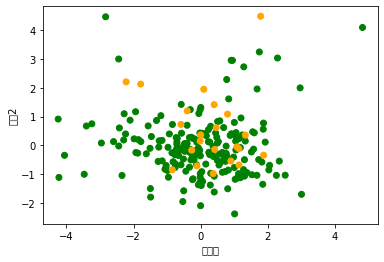

In [143]:
#絶対的な（≠ある曲に対して相対的）曲データの散らばり具合を把握。

plt.figure(figsize=(6, 4))

#自曲はオレンジ、他曲は緑 from df6
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=['orange' if label == 1 else 'green' for label in df6['name_number']])

plt.xlabel('成分１')
plt.ylabel('成分2')
plt.show

In [172]:
df10.shape

(224, 3)

In [173]:
s=pd.DataFrame(data=x_pca, columns=['成分１', '成分２','成分3'], dtype=float)
df11=pd.concat([df10,s],axis=1)

In [174]:
df11.tail(22)

,track_id,name,name_number,成分１,成分２,成分3
202,7EYqha5R0Pty8onSGBHmxB,Mercy,1,0.895773,-0.541008,0.003259
203,1oGTCgHtfMtntMG88l2nii,Aeon,1,-0.114505,-0.708322,-0.628315
204,1OFiIpCWktByeDCBIfNNAl,Unfold,1,-0.003133,0.367062,-0.823254
205,1wPQiFJB11NoYXQNVQ7hrg,Tomorrow,1,1.326539,0.358426,-0.990118
206,5RT9xG1UEDaM48HyqGaZJS,Departure,1,1.870995,-0.337546,0.035337
207,7ssdwqAA5Pk5AwbpstlMWi,Brave,1,-0.848462,-0.847223,-0.532779
208,2wPZz3bU0sdvW0I5mP9LNZ,Home,1,-1.790375,2.126577,1.408810
209,5thHu6dTknfij6M9ZQWy1n,Nostalgia,1,-0.019024,0.151107,-0.759489
210,0dZqFmCZpcUXnbHTVGPOB5,Insight,1,1.134172,-0.111068,0.122334
211,4fydLPUpvmzST7EyJVpBaC,Sign,1,0.458671,0.614145,-0.522036


In [175]:
#対象曲はx_pcaの何番目か？　（曲名：Mercy,順番：202)
print(x_pca[202],x_pca[201])

[ 0.89577346 -0.54100755  0.00325861] [-1.318594    0.86468092  0.66929972]


In [177]:
#相対的な座標（成分１',成分２’,成分３’）を設ける
P = x_pca

# 対象曲
A = np.array([ 0.89577346, -0.54100755, 0.00325861])

# 各点と A との相対距離を計算
relative_distances = np.linalg.norm(P - A, axis=1)
df11['近似度'] = relative_distances
df11.head()


,track_id,name,name_number,成分１,成分２,成分3,近似度
0,0SGBSwX49QWTGiXMu39mUz,Stillness,0,-1.511016,-0.099016,0.183259,2.453649
1,7jUgBIVfc6C2YfFqFmETxz,Air from Air,0,-0.590373,-0.672051,-0.638966,1.624271
2,7JuANIIOksqHRFXgE8tEld,Lisser,0,1.819435,-0.577308,-0.750645,1.192828
3,6KMs0FhZnbJZINvhguzhpe,Amber,0,-0.018745,-1.099211,0.827836,1.351985
4,25DsngbeW7QvMTuPJBy8ww,Down The Line,0,-0.245922,-1.185418,-0.043901,1.311852


In [178]:
print(df11.iloc[202])

track_id       7EYqha5R0Pty8onSGBHmxB
name                            Mercy
name_number                         1
成分１                          0.895773
成分２                         -0.541008
成分3                          0.003259
近似度                               0.0
Name: 202, dtype: object


In [179]:
#近似度順に並び替え
df12 =df11.sort_values(by='近似度')
#上から２０番目まで表示。
df12.head(20)

,track_id,name,name_number,成分１,成分２,成分3,近似度
202,7EYqha5R0Pty8onSGBHmxB,Mercy,1,0.895773,-0.541008,0.003259,6.238246e-09
51,2oafUifmaR1uBS3o9o7uLO,Quiet Eyes,0,0.974950,-0.404944,0.000660,1.574446e-01
114,5wN9u0f98S84bJNduSYdFG,Australia,0,0.687745,-0.477088,0.079982,2.307555e-01
11,22fK1BNvptS8jrDqgMQ7Em,Kastepiisk,0,0.759323,-0.282576,-0.017785,2.929988e-01
133,6LU350ky5JGQ4VwJsTfIq9,Everything Is You,0,0.737037,-0.550913,0.262991,3.045590e-01
198,1gjZYQff9vXXru1KI6XJHd,Magnificent,0,0.643216,-0.246695,-0.053098,3.918946e-01
129,6XxqVuReY8oStJvHuG3cOZ,Feathers,0,0.556048,-0.296951,0.004425,4.183045e-01
77,3U987lHXBgataMkhfi7YAL,Lullaby,0,0.490780,-0.515914,0.247583,4.736497e-01
210,0dZqFmCZpcUXnbHTVGPOB5,Insight,1,1.134172,-0.111068,0.122334,5.058271e-01
106,7hpSoEf1bBMtJyFiq8xQyp,Twilight,0,0.998258,-0.765328,0.473230,5.307507e-01


In [180]:
track_id_list = df12['track_id'].head(20).tolist()
print(track_id_list)

['7EYqha5R0Pty8onSGBHmxB', '2oafUifmaR1uBS3o9o7uLO', '5wN9u0f98S84bJNduSYdFG', '22fK1BNvptS8jrDqgMQ7Em', '6LU350ky5JGQ4VwJsTfIq9', '1gjZYQff9vXXru1KI6XJHd', '6XxqVuReY8oStJvHuG3cOZ', '3U987lHXBgataMkhfi7YAL', '0dZqFmCZpcUXnbHTVGPOB5', '7hpSoEf1bBMtJyFiq8xQyp', '0X5m41yl6i5wTJ4PlCeZRa', '2yDIfosvpcbhKj3liMHZov', '1cTCSy4aSPecGDDx3wqUjD', '2kfYhnurfTZzBOei3IxO6K', '6Ab0DT2fQv7ZQWxfMBrqZP', '7kaE0yge2zcyQn1SA6Ectq', '79QWY71xWy96RCEZK720en', '7DEtUcuVDrjKf2VaVwarV5', '7JxnwtrmZVwIt4jEsVlRHT', '2vcdqUMFMbKYvqzBYsVZDn']


In [ ]:
#プレイリストへの自動反映＝ここからは貼り付けのみ

import os
os.environ["SPOTIPY_CLIENT_ID"] = "個人情報のため非掲載"
os.environ["SPOTIPY_CLIENT_SECRET"] = "個人情報のため非掲載"
os.environ["SPOTIPY_REDIRECT_URI"] = "https://localhost:8888/callback"

In [ ]:
# プレイリストの曲全削除
import spotipy
from spotipy.oauth2 import SpotifyOAuth

username = "個人情報のため非掲載"
scope = "user-library-read user-read-playback-state playlist-read-private user-read-recently-played playlist-read-collaborative playlist-modify-public playlist-modify-private"

playlist_id = "個人情報のため非掲載"

spotify = spotipy.Spotify(auth_manager=SpotifyOAuth(open_browser=False, scope=scope))
tracks_json = spotify.playlist_items(playlist_id)
track_items = tracks_json["items"]

tracks = [track_item["track"]["id"] for track_item in track_items if track_item["track"] is not None]

spotify.playlist_remove_all_occurrences_of_items(playlist_id, tracks)

In [ ]:
USERNAME = "個人情報のため非掲載"
SCOPE = "user-library-read user-read-playback-state playlist-read-private user-read-recently-played playlist-read-collaborative playlist-modify-public playlist-modify-private"

spotify = spotipy.Spotify(auth_manager=SpotifyOAuth(open_browser=False, scope=SCOPE))
snapshot_id = "個人情報のため非掲載"
playlist = "個人情報のため非掲載"
track_id = urls

spotify.user_playlist_add_tracks(USERNAME, playlist, track_id)
print("プレイリストに曲を追加しました！")